In [44]:
import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [46]:
!pip install textblob      

import textblob       
from textblob import TextBlob

In [11]:
cust_rev = pd.read_excel("C:\\Users\\rache\\OneDrive\\Desktop\\Practicum Project\\Stitch fix reviews.xlsx")
cust_rev

,Feedback,Ratings out of 5,Date_of_Review,Reviews
0,9.0,5,"March 4,2023",Stylist took my comments in preview and notes ...
1,1.0,5,"March 4,2023",Had two boxes so far and I’m so so happy with ...
2,1.0,5,"March 2,2023","I only had to deliveries till now, but i love ..."
3,7.0,5,"March 3,2023","Great service throughout, flexible and easy to..."
4,6.0,1,"March 3,2023",I was sent a yellow coat in my Stitch Fix. I l...
...,...,...,...,...
1570,1.0,1,"Oct 23, 2020",Horrible customer service. I tried to sign up ...
1571,2.0,3,"Oct 17, 2020",I think the boxes are hit or miss. I scheduled...
1572,1.0,2,"Oct 17, 2020","I was so excited to try stitch fix, but I ende..."
1573,1.0,5,"Oct 14, 2020",I've had about 4 stitch fix boxes now and I ha...


In [14]:
len(cust_rev['Reviews'])

1575

In [19]:
print(cust_rev.dtypes)

Feedback            float64
Ratings out of 5      int64
Date_of_Review       object
Reviews              object
dtype: object


In [20]:
cust_rev['Reviews'].astype(str)

0       Stylist took my comments in preview and notes ...
1       Had two boxes so far and I’m so so happy with ...
2       I only had to deliveries till now, but i love ...
3       Great service throughout, flexible and easy to...
4       I was sent a yellow coat in my Stitch Fix. I l...
                              ...                        
1570    Horrible customer service. I tried to sign up ...
1571    I think the boxes are hit or miss. I scheduled...
1572    I was so excited to try stitch fix, but I ende...
1573    I've had about 4 stitch fix boxes now and I ha...
1574    I signed up with stitch fix after my sister wa...
Name: Reviews, Length: 1575, dtype: object

In [39]:
cust_rev = cust_rev.dropna()
len(cust_rev)

1537

In [40]:
cust_rev.drop_duplicates(keep='first')
cust_rev

,Feedback,Ratings out of 5,Date_of_Review,Reviews
0,9.0,5,"March 4,2023",Stylist took my comments in preview and notes ...
1,1.0,5,"March 4,2023",Had two boxes so far and I’m so so happy with ...
2,1.0,5,"March 2,2023","I only had to deliveries till now, but i love ..."
3,7.0,5,"March 3,2023","Great service throughout, flexible and easy to..."
4,6.0,1,"March 3,2023",I was sent a yellow coat in my Stitch Fix. I l...
...,...,...,...,...
1570,1.0,1,"Oct 23, 2020",Horrible customer service. I tried to sign up ...
1571,2.0,3,"Oct 17, 2020",I think the boxes are hit or miss. I scheduled...
1572,1.0,2,"Oct 17, 2020","I was so excited to try stitch fix, but I ende..."
1573,1.0,5,"Oct 14, 2020",I've had about 4 stitch fix boxes now and I ha...


# Sentiment Analysis

In [50]:
import warnings
warnings.filterwarnings("ignore") 

In [51]:
cust_rev['Polarity'] = cust_rev['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
cust_rev['PolarityB'] = np.where(cust_rev['Polarity']>0.2,1,(np.where(cust_rev['Polarity']<-0.2,0,100)))

In [52]:
cust_rev.head()

,Feedback,Ratings out of 5,Date_of_Review,Reviews,Polarity,PolarityB
0,9.0,5,"March 4,2023",Stylist took my comments in preview and notes ...,0.357576,1
1,1.0,5,"March 4,2023",Had two boxes so far and I’m so so happy with ...,0.269388,1
2,1.0,5,"March 2,2023","I only had to deliveries till now, but i love ...",0.343333,1
3,7.0,5,"March 3,2023","Great service throughout, flexible and easy to...",0.447619,1
4,6.0,1,"March 3,2023",I was sent a yellow coat in my Stitch Fix. I l...,0.083333,100


In [53]:
pd.crosstab(index = cust_rev["PolarityB"], columns="Total count")

col_0,Total count
PolarityB,
0,42
1,983
100,512


In [55]:
cust_rev = cust_rev.rename(columns={'Ratings out of 5':'ratings'})
cust_rev

,Feedback,ratings,Date_of_Review,Reviews,Polarity,PolarityB
0,9.0,5,"March 4,2023",Stylist took my comments in preview and notes ...,0.357576,1
1,1.0,5,"March 4,2023",Had two boxes so far and I’m so so happy with ...,0.269388,1
2,1.0,5,"March 2,2023","I only had to deliveries till now, but i love ...",0.343333,1
3,7.0,5,"March 3,2023","Great service throughout, flexible and easy to...",0.447619,1
4,6.0,1,"March 3,2023",I was sent a yellow coat in my Stitch Fix. I l...,0.083333,100
...,...,...,...,...,...,...
1570,1.0,1,"Oct 23, 2020",Horrible customer service. I tried to sign up ...,-0.148242,100
1571,2.0,3,"Oct 17, 2020",I think the boxes are hit or miss. I scheduled...,0.004907,100
1572,1.0,2,"Oct 17, 2020","I was so excited to try stitch fix, but I ende...",0.156643,100
1573,1.0,5,"Oct 14, 2020",I've had about 4 stitch fix boxes now and I ha...,0.256061,1


In [56]:
cust_rev["Satisfied"] = np.where(cust_rev['ratings']>3,1,(np.where(cust_rev['ratings']<3,0,100)))
pd.crosstab(index = cust_rev["Satisfied"], columns="Total count")

col_0,Total count
Satisfied,
0,284
1,1146
100,107


array([<AxesSubplot:ylabel='Total count'>], dtype=object)

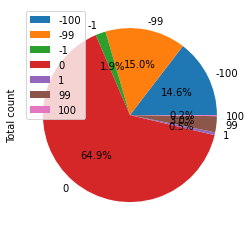

In [57]:
cust_rev["Difference"]= cust_rev["Satisfied"]- cust_rev["PolarityB"]
pd.crosstab(index = cust_rev["Difference"], columns="Total count").plot(kind='pie', subplots=True, autopct='%1.1f%%')

In [73]:
cust_rev['Difference'].value_counts()

 0      997
-99     230
-100    224
 99      46
-1       28
 1        7
 100      3
Name: Difference, dtype: int64

In [71]:
FalseNeg = cust_rev
FalseNeg = FalseNeg[FalseNeg["Difference"]==-1]
FalseNeg

,Feedback,ratings,Date_of_Review,Reviews,Polarity,PolarityB,Satisfied,Difference
36,1.0,1,"Feb 23, 2023","Brief not listened to again, even when first s...",0.284722,1,0,-1
105,1.0,2,"Feb 6, 2023",My first box was great but really disappointed...,0.314286,1,0,-1
181,4.0,1,"Feb 6, 2023",It was just okay the jeans are still coming wa...,0.250000,1,0,-1
202,3.0,2,"Jan 30, 2023",Fix itself was great but original order was lo...,0.587500,1,0,-1
215,10.0,1,"Jan 28, 2023",Stich Fix have set up this alternative trust p...,0.227930,1,0,-1
278,2.0,1,"Jan 14, 2023","First fix was a perfect match, kept all five i...",0.412500,1,0,-1
367,2.0,2,"Dec 23, 2022","Hi, I had asked for things to wear for Christm...",0.216667,1,0,-1
441,4.0,1,"Dec 5, 2022",The clothes were not to my liking and the fit ...,0.400000,1,0,-1
578,9.0,2,"Nov 6, 2022",The quality was not as good as usual and the s...,0.383333,1,0,-1
1106,1.0,2,"Aug 6, 2022",I really tried to love Stitch Fix but I just c...,0.347500,1,0,-1


In [70]:
FalseNeg = FalseNeg[FalseNeg["Polarity"]>0.6]
FalseNeg

,Feedback,ratings,Date_of_Review,Reviews,Polarity,PolarityB,Satisfied,Difference
1324,2.0,1,"Dec 23, 2022",I'm giving Stitch Fix 1 star because ZERO is n...,0.65,1,0,-1


In [61]:
FalseNeg = cust_rev
FalseNeg = FalseNeg[FalseNeg["Difference"]==-1]
FalseNeg = FalseNeg[FalseNeg["Polarity"]>0.6]
FalsePos = cust_rev
FalsePos = FalsePos[FalsePos["Difference"]==1]
FalsePos = FalsePos[FalsePos["Polarity"]<-0.6]
cust_rev = pd.concat([cust_rev,FalseNeg,FalsePos]).drop_duplicates(keep=False)

In [64]:
len(cust_rev)

1535

In [68]:
FalsePos

,Feedback,ratings,Date_of_Review,Reviews,Polarity,PolarityB,Satisfied,Difference
1280,43.0,4,"March 28, 2019",I tried about 3 shipments and kept a some of t...,-0.75,0,1,1


# Analyze the data
## Tokenise data

In [37]:
cust_rev['Reviews'].apply(lambda x: len(str(x).split(' ')))

0        63
1        67
2        75
3        60
4        52
       ... 
1570    127
1571    213
1572    145
1573    109
1574    269
Name: Reviews, Length: 1575, dtype: int64